In [166]:
# Stock Price Prediction with Machine Learning in Python

In [167]:
import pandas as pd

In [168]:
import pandas_datareader as web

In [169]:
import yfinance as yf

In [170]:
import matplotlib.pyplot as plt

In [171]:
import math

In [172]:
from sklearn.preprocessing import MinMaxScaler

In [173]:
import numpy as np

In [174]:
from keras.models import Sequential

In [175]:
from keras.layers import Dense, LSTM

In [176]:
# Get historical Stock Prices of NEMAURA MEDICAL INC. NMRD manufactures and commercializes glucose monitoring systems.

In [177]:
stock_data = yf.download('ANGELONE.NS', start='2023-05-06', end='2025-06-19')

/tmp/ipython-input-177-2954954349.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download('ANGELONE.NS', start='2023-05-06', end='2025-06-19')
[*********************100%***********************]  1 of 1 completed


In [178]:
# Plot the NMRD Closing Stock Price History

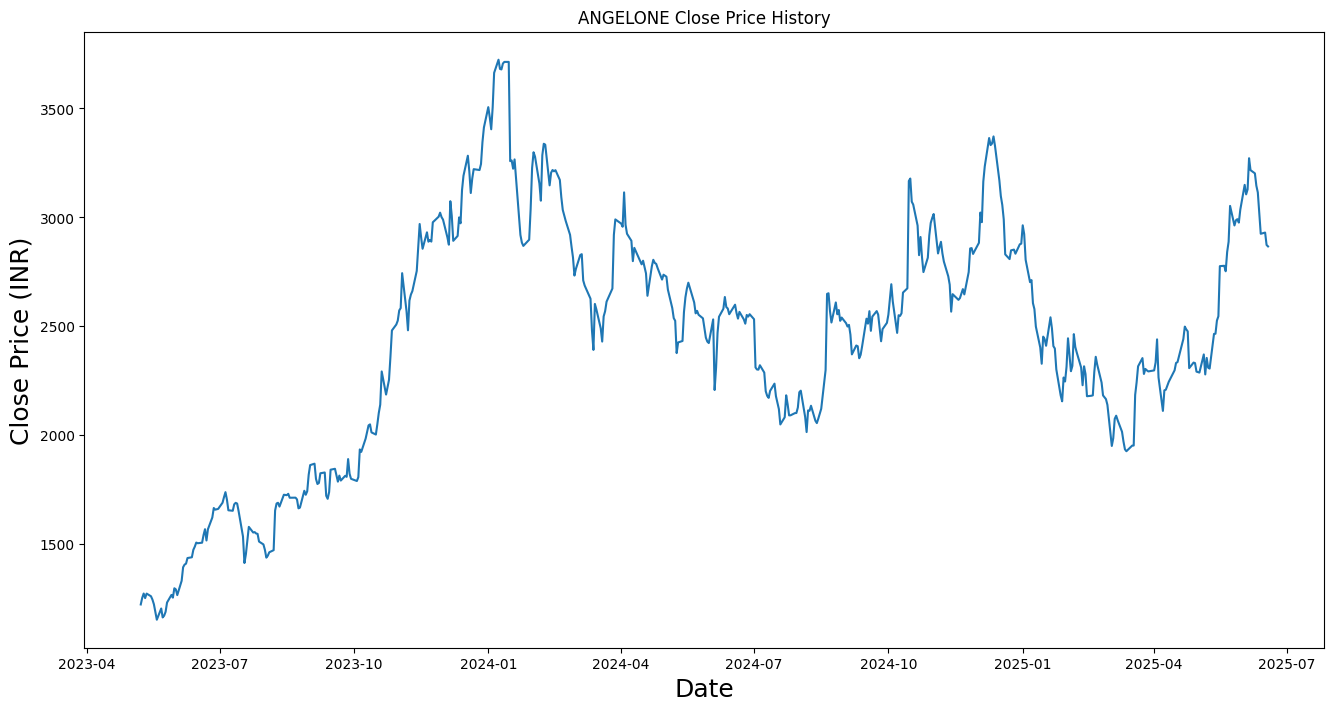

In [179]:
plt.figure(figsize=(16,8))
plt.title('ANGELONE Close Price History')
plt.plot(stock_data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (INR)', fontsize=18)
plt.show()

In [180]:
# Prepare the 80% NMRD dataset for training the Machine Learning Model

In [181]:
data = stock_data[['Close']]   # Only 'Close' column
dataset = data.values                 # Numpy array
training_data_len = math.ceil(len(dataset) * 0.8)

In [182]:
# Start scaling the data

In [202]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
print("Scaled data shape:", scaled_data.shape)

Scaled data shape: (523, 1)


In [184]:
# Now start creating a training data set and split

In [185]:
training_data_set = scaled_data[0:TrainingDataSize, :]
x_training = []
y_training = []
for i in range(60, len(training_data_set)):
    x_training.append(training_data_set[i-60:i, 0])
    y_training.append(training_data_set[i, 0])
    if i <= 60:
        print(x_training)
        print(y_training)
        print()

[array([0.02724812, 0.039127  , 0.04678353, 0.03860156, 0.04667097,
       0.04188565, 0.0359369 , 0.02752967, 0.01383055, 0.        ,
       0.02004213, 0.00407227, 0.00714976, 0.01413076, 0.03073862,
       0.04426886, 0.03942727, 0.05614774, 0.05423364, 0.04394988,
       0.06952779, 0.09373595, 0.09838999, 0.10013509, 0.11015626,
       0.11152615, 0.12477484, 0.13046089, 0.13776087, 0.13659435,
       0.13753508, 0.15130692, 0.16167366, 0.14150491, 0.16165476,
       0.18255726, 0.19947113, 0.19655489, 0.19790959, 0.20891585,
       0.21883086, 0.22780518, 0.21457882, 0.19540732, 0.19456072,
       0.20605608, 0.20872772, 0.20744835, 0.19395863, 0.14863538,
       0.10126149, 0.11710297, 0.14210695, 0.16580174, 0.15571437,
       0.15645253, 0.15401115, 0.15331088, 0.13953306, 0.13447987])]
[np.float64(0.12494145053352568)]



In [186]:
# Prepare the training data set for the model

In [187]:
x_training, y_training = np.array(x_training), np.array(y_training)
x_training = np.reshape(x_training, (x_training.shape[0], x_training.shape[1], 1))

In [188]:
# Start building and Compile the LSTM Model (Long Short-Term Memory)

In [189]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_training.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [190]:
# Now train the model with the previous prepared training data set

In [191]:
model.fit(x_training, y_training, batch_size=1, epochs=7)

Epoch 1/7
463/463 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - loss: 0.0230
Epoch 2/7
463/463 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - loss: 0.0048
Epoch 3/7
463/463 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - loss: 0.0035
Epoch 4/7
463/463 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - loss: 0.0028
Epoch 5/7
463/463 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - loss: 0.0020
Epoch 6/7
463/463 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - loss: 0.0020
Epoch 7/7
463/463 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - loss: 0.0022


In [192]:
# Start creating a testing data set

In [193]:
testing_data = scaled_data[training_data_len - 60:]
x_testing = []
y_testing = dataset[training_data_len:, :]
for i in range(60, len(testing_data)):
    x_testing.append(testing_data[i-60:i, 0])

In [194]:
# Prepare testing data for the model

In [195]:
x_testing = np.array(x_testing)
x_testing = np.reshape(x_testing, (x_testing.shape[0], x_testing.shape[1], 1))

In [196]:
# Get the Predicted Stock Price Values for the test data set

In [197]:
predictions = model.predict(x_testing)
predictions = scaler.inverse_transform(predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step


In [198]:
# Evaluate the model by calculating the RMSE

In [199]:
rmse = np.sqrt(np.mean((predictions - y_testing)**2))
print(rmse)

83.96427920269855


In [200]:
pd.set_option('mode.chained_assignment', None)

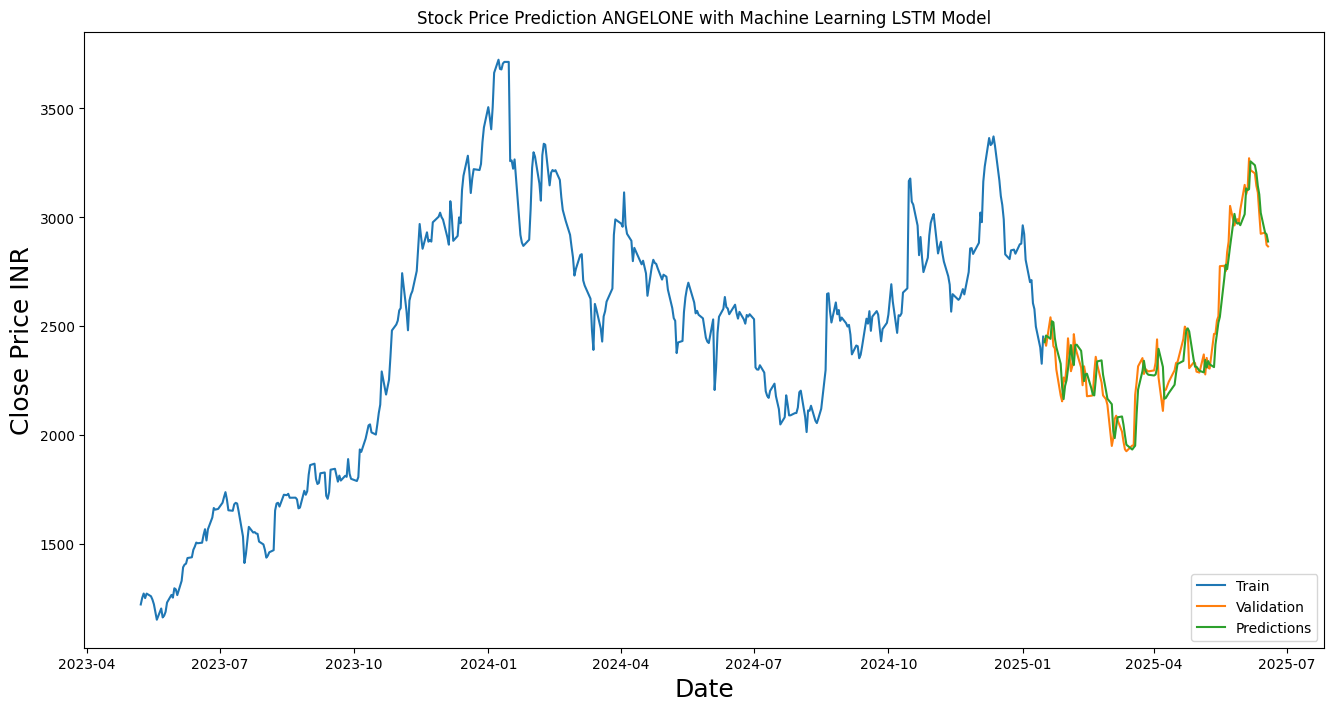

In [204]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction ANGELONE with Machine Learning LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()